# Simple linear regression model

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
data = pd.read_csv('C:/Users/Usuario/Desktop/proyectos/Analisis_Financiero_1/Datasets/portfolio_data.csv', index_col=0, parse_dates=True)
data.head()

,AMZN,DPZ,BTC,NFLX
Date,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714
2013-05-02,252.550003,51.987320,98.099998,30.641428
2013-05-03,258.049988,52.446388,112.900002,30.492857
2013-05-06,255.720001,53.205257,109.599998,30.098572
2013-05-07,257.730011,54.151505,113.199997,29.464285


# Simple linear regression

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

**We shall base on the association between AMZN and NFLX and create a simple linear regression model. Let's use python in estimating the values of B0 and B1 (intercept and slope)**

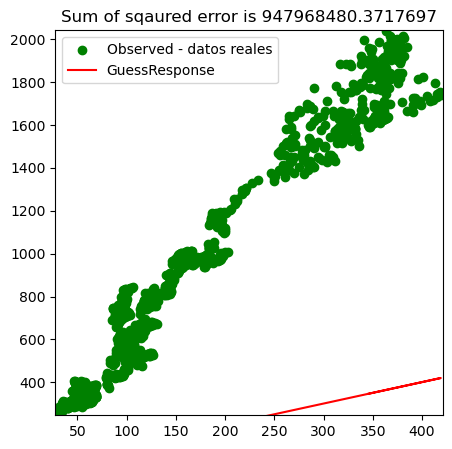

In [3]:
# lets try to guess (adivinar) what are the real values of intercept and slope ( pendiente) 
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.97
b1 = 1
data['GuessResponse'] = b0 + b1*data['NFLX']     # GuessResponse = respuesta estimada  
                                                 #  el modelo está intentando predecir AMZN en función de 'NFLX'

# Also want to know the error of of guess...
# This show how far is our guess response from the true response    
data['observederror'] = data['AMZN'] - data['GuessResponse']         # diferencia entre la respuesta real (MEDV) y la respuesta estimada (GuessResponse).
                                                                     # Este error nos indica qué tan lejos está nuestra predicción de los valores reale

# plot your estimated line together with the points
plt.figure(figsize=(5, 5))
plt.title('Sum of sqaured error is {}'.format((((data['observederror'])**2)).sum()))   #  SSE es la suma de los errores cuadráticos.
plt.scatter(data['NFLX'], data['AMZN'], color='g', label='Observed - datos reales')                  #  gráfico de dispersión (scatter plot) entre variables
plt.plot(data['NFLX'], data['GuessResponse'], color='red', label='GuessResponse')    # gráfico de línea para mostrar una estimación o modelo de predicción.
plt.legend()
plt.xlim(data['NFLX'].min()-2, data['NFLX'].max()+2)   # establece los límites de los ejes
plt.ylim(data['AMZN'].min()-2, data['AMZN'].max()+2)   # -2 y +2: margen para el efectuo visual mas legible
plt.show()

# Least sqaure estimates

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9068\679448483.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_ols = model.params[0]   #valor estimado de la intersección de la recta con el eje y cuando NFLZ = 0.    # b0_ols = model.params.iloc[0]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9068\679448483.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1_ols = model.params[1]   #pendiente                                                                      # b1_ols = model.params.iloc[1]


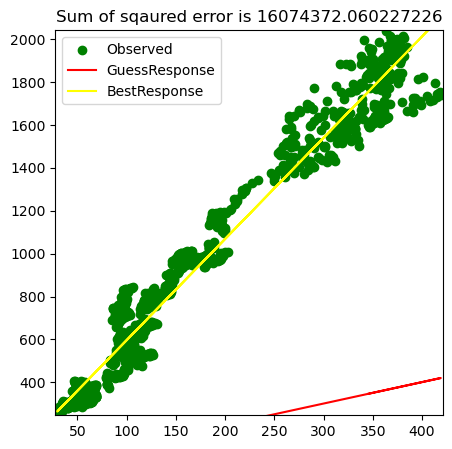

In [4]:
# Input the formula (refer to the lecture video 4.3)

formula = "AMZN~NFLX"   # izq variable dependiente  # der variable independiente
# implicita la formula : AMZN= β0 + β1 * NFLZ + ϵ

model = smf.ols(formula=formula, data=data).fit()
# conceptos del lado izquiedo de la igualdad son los parámetros fijos ( no cambian) 
# smf.ols no realiza el cálculo de la regresión de inmediato. Simplemente prepara el modelo para ser ajustado.
# con .fit(), el modelo calcula los valores estimados de los parámetros.
# métodos de mínimos cuadrados ordinarios (OLS)


# Attribute 'params' returns a list of estimated parameters form model

b0_ols = model.params[0]   #valor estimado de la intersección de la recta con el eje y cuando NFLZ = 0.    # b0_ols = model.params.iloc[0]
b1_ols = model.params[1]   #pendiente                                                                      # b1_ols = model.params.iloc[1]

data['BestResponse'] = b0_ols + b1_ols*data['NFLX']
 
# Also want to know the error of of guess...
data['error'] = data['AMZN'] - data['BestResponse']


# plot your estimated line together with the points
plt.figure(figsize=(5, 5))

# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((data['error'])**2)).sum()))   # debe ser mínima en el caso de un buen ajuste de mínimos cuadrados.

plt.scatter(data['NFLX'], data['AMZN'], color='g', label='Observed')

plt.plot(data['NFLX'], data['GuessResponse'], color='red', label='GuessResponse')   # Representa la respuesta que se predice de manera inicial
plt.plot(data['NFLX'], data['BestResponse'], color='yellow', label='BestResponse')   # respuesta predicha por el modelo OLS 

plt.legend()

plt.xlim(data['NFLX'].min()-2, data['NFLX'].max()+2)
plt.ylim(data['AMZN'].min()-2, data['AMZN'].max()+2)

plt.show()

# Summary table

In [5]:
#Refer to the P-value of RM, Confidence Interval and R-square to evaluate the performance.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AMZN   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 3.704e+04
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:52:33   Log-Likelihood:                -9199.2
No. Observations:                1520   AIC:                         1.840e+04
Df Residuals:                    1518   BIC:                         1.841e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.4562      4.482     27.770      0.000     115.665     133.247
NFLX           4.7206      0.025    192.454      0.000       4.673       4.769
==============================================================================
Omnibus:                        4.077   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                4.315
Skew:                           0.067   Prob(JB):                        0.116
Kurtosis:                       3.224   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Análisis de Regresión Lineal: AMZN vs. NFLX

#### **Resultados del Modelo (OLS)**
| Métrica               | Valor       | Interpretación                                                                 |
|-----------------------|-------------|--------------------------------------------------------------------------------|
| **R-squared**         | 0.961       | 96.1% de la variabilidad de AMZN es explicada por NFLX.                        |
| **Adj. R-squared**    | 0.961       | Confirmación de que el modelo no tiene variables innecesarias.                 |
| **F-statistic**       | 3.704e+04   | Modelo estadísticamente significativo (p-value = 0.00).                        |

---

#### **Coeficientes**
| Variable    | Coeficiente | p-value | Intervalo [0.025, 0.975] | Interpretación                                  |
|-------------|-------------|---------|---------------------------|------------------------------------------------|
| **Intercept** | 124.4562   | 0.000   | [115.665, 133.247]        | Valor base de AMZN cuando NFLX = 0.            |
| **NFLX**    | 4.7206      | 0.000   | [4.673, 4.769]            | Por cada unidad que aumenta NFLX, AMZN sube 4.72. |

---

#### **Diagnóstico del Modelo**
| Test                 | Valor       | p-value | Conclusión                                      |
|----------------------|-------------|---------|-------------------------------------------------|
| **Durbin-Watson**    | 0.031       | -       | Autocorrelación positiva fuerte (problema grave). |
| **Omnibus**          | 4.077       | 0.130   | Residuos normalmente distribuidos.              |
| **Jarque-Bera**      | 4.315       | 0.116   | Confirmación de normalidad en residuos.         |

---

#### **Problemas Detectados**
1. **Autocorrelación**:  
   - Durbin-Watson ≈ 0 sugiere dependencia temporal no capturada.  
   *Solución*: Usar modelos ARIMA o incluir retardos.  

2. **R² demasiado alto**:  
   - Riesgo de relación espuria (si ambas series son no estacionarias).  
   *Solución*: Verificar con tests de raíz unitaria (ADF).  

---

#### **Conclusión**  
- **Ecuación estimada**:  
  `AMZN = 124.4562 + 4.7206 * NFLX`  
- **Fortalezas**:  
  - Coeficientes significativos (p-values ≈ 0).  
  - Alto poder predictivo (R² = 96.1%).  
- **Limitaciones**:  
  - Problemas de autocorrelación y posible no estacionariedad.  
  - *Recomendación*: Analizar residuos y probar modelos alternativos.  